#  <========= Breast Cancer Detection with SVM and KNN =========>

In [1]:
# Check Python Version
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2


In [2]:
#import and changing name of module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names = names)

In [4]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.loc[99]

id                        1166630
clump_thickness                 7
uniform_cell_size               5
uniform_cell_shape              6
marginal_adhesion              10
single_epithelial_size          5
bare_nuclei                    10
bland_chromatin                 7
normal_nucleoli                 9
mitoses                         4
class                           4
Name: 99, dtype: object

In [7]:
# Preprocess the data
df.replace('?', -99999, inplace = True )

df.drop('id', axis = 1, inplace = True)

In [8]:
df.dtypes

clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromatin            int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object

In [9]:
df.shape

(699, 10)

In [10]:
# Describe the dataset
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


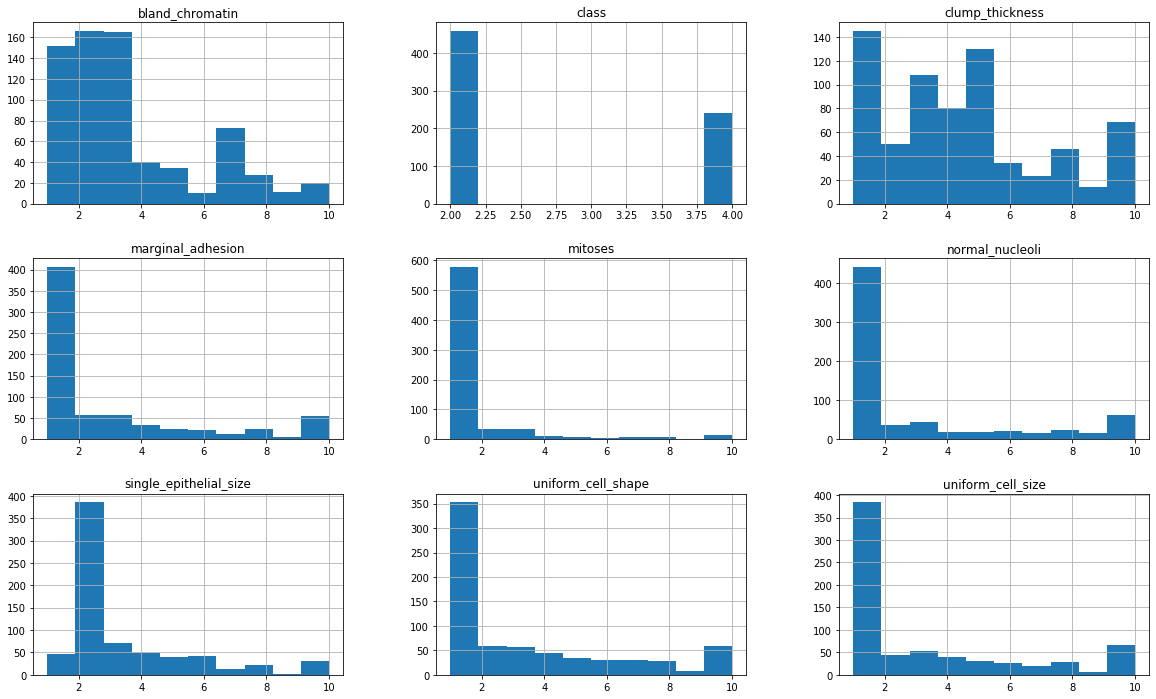

In [11]:
# Plot histograms for each variable
df.hist(figsize=(20,12))
plt.show()

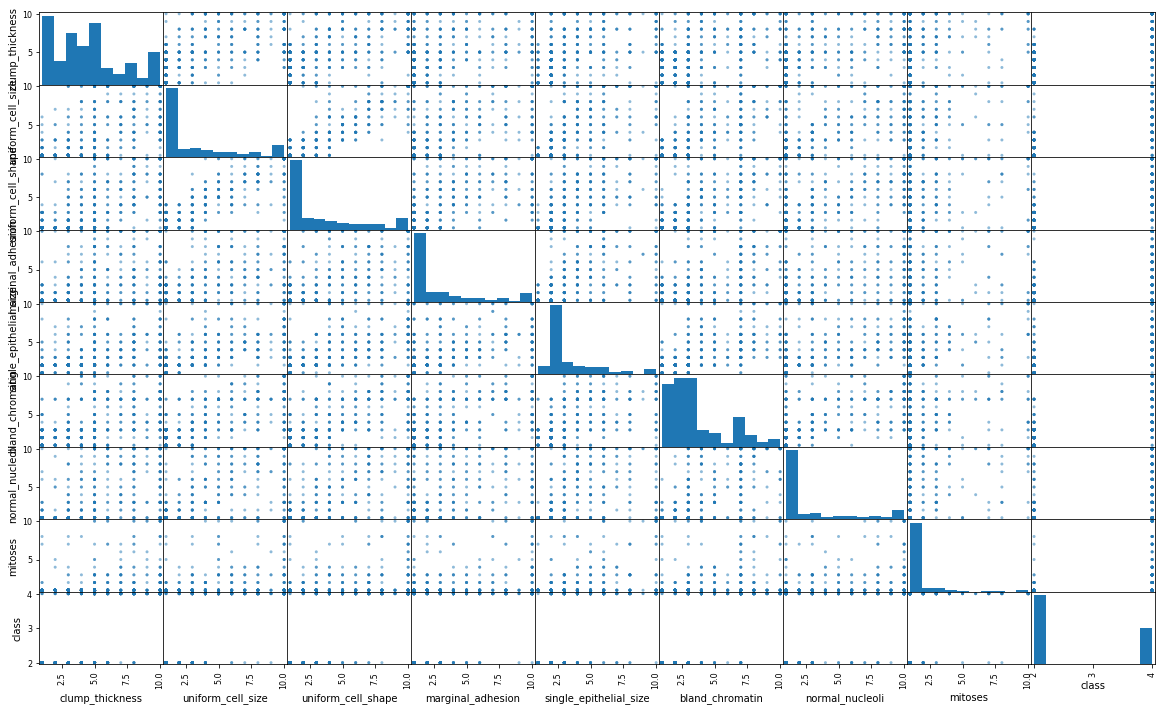

In [12]:
# Create scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,12))
plt.show()

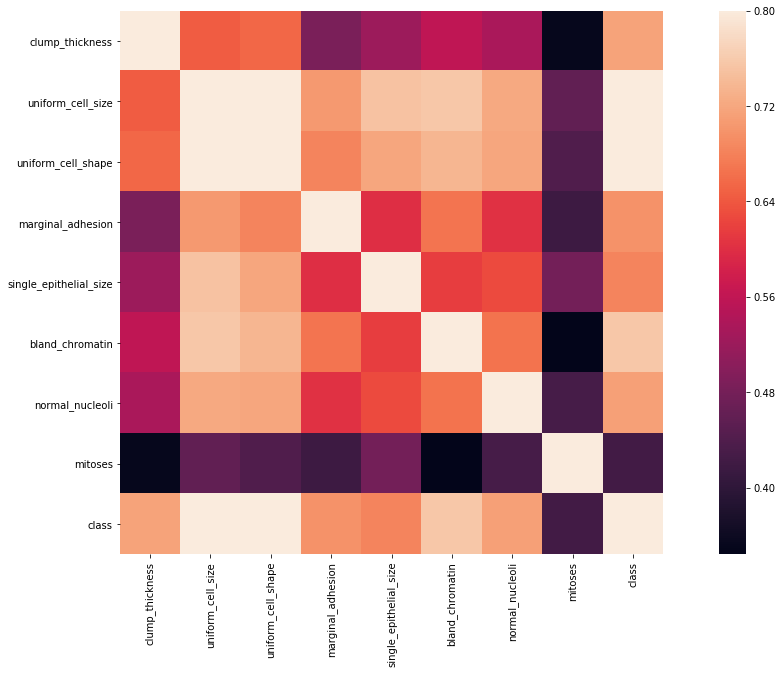

In [13]:
#Heat map for correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (20, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True)


In [14]:
# Create X and Y datasets for training
X = df.drop('class', axis = 1)
y = df['class']

# Split datasets into testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 

In [15]:
#import KNN and SVM module from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [16]:
# evaluate each model in turn
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVM", SVC()))
result = []
names = []
from sklearn.model_selection import cross_val_score, KFold
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 4)
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy'  )
    print("%s: %f {%f} "%(name, cv_result.mean(), cv_result.std()))

KNN: 0.965974 {0.024629} 
SVM: 0.955162 {0.024791} 


C:\Users\Ajit kumar Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ajit kumar Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ajit kumar Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ajit kumar Singh\Anaconda3\lib\site-p

In [17]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score, classification_report
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM

C:\Users\Ajit kumar Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.95      0.97        92
           4       0.91      1.00      0.95        48

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

